## **_Import Libraries_**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import dotenv
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

## _Gathering Data & Quickly EDA_


In [2]:
#Reading data from CSV
#Converto la colonna "date" in "datetime64[ns]"

directory_path = "C://Users//bulan//OneDrive//Desktop//esame_python//dataset"
file_name = "owid-covid-data.csv"
file_path = os.path.join(directory_path, file_name)

df = pd.read_csv(file_path, parse_dates=["date"])
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Dimensioni del DATASET e relativi metadati
# dtypes: datetime64[ns](1), float64(62), object(4)
# memory usage: 271.9 MB

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387253 entries, 0 to 387252
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    387253 non-null  object        
 1   continent                                   368726 non-null  object        
 2   location                                    387253 non-null  object        
 3   date                                        387253 non-null  datetime64[ns]
 4   total_cases                                 348333 non-null  float64       
 5   new_cases                                   376280 non-null  float64       
 6   new_cases_smoothed                          375050 non-null  float64       
 7   total_deaths                                326109 non-null  float64       
 8   new_deaths                                  376589 non-null  float64      

In [4]:
# Informazioni statistiche circa le colonne numeriche del dataset
# Formattazione dell' output per rimuovere la notazione scientifica

df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,387253.00000,348333.00000,376280.00000,375050.00000,326109.00000,376589.00000,375359.00000,348333.00000,376280.00000,375050.00000,...,222633.00000,147326.00000,265585.00000,356680.00000,291642.00000,387253.00000,13172.00000,13172.00000,13172.00000,13172.00000
mean,.5f,7386531.56043,8728.78071,8756.91641,89964.68709,78.15794,78.40517,112347.96766,132.57234,133.00219,...,32.91155,50.79314,3.09747,73.71179,0.72256,129163247.55744,55715.62946,9.76358,10.99242,1772.58045
min,.5f,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.70000,1.18800,0.10000,53.28000,0.39400,47.00000,-37726.09800,-44.23000,-95.92000,-2936.45310
25%,.5f,9448.00000,0.00000,0.00000,136.00000,0.00000,0.00000,2954.50900,0.00000,0.00000,...,22.60000,20.85900,1.30000,69.59000,0.60200,449002.00000,176.89976,2.05750,-1.49000,119.53188
50%,.5f,79713.00000,0.00000,17.00000,1393.00000,0.00000,0.14300,32240.54200,0.00000,4.19700,...,33.10000,49.83900,2.50000,75.05000,0.74000,5882259.00000,6669.15015,8.15000,5.66000,1245.88025
75%,.5f,851668.00000,0.00000,402.42900,12573.00000,0.00000,4.00000,155233.87700,0.00000,68.59800,...,41.30000,83.24100,4.20000,79.46000,0.82900,28301700.00000,38790.63400,15.04000,15.71000,2872.87288
max,.5f,774954379.00000,44236227.00000,6319461.00000,7040264.00000,103719.00000,14817.00000,765370.75600,240325.86600,34332.26700,...,78.10000,100.00000,13.80000,86.75000,0.95700,7975105024.00000,1327828.10000,78.08000,377.70000,10293.51500
std,nan,43985088.36620,239704.80135,90385.26462,456699.15628,1424.51755,534.38755,160036.51961,1544.31177,571.52993,...,13.57295,31.95341,2.54827,7.39495,0.14900,663065215.69852,155616.62475,12.02555,24.59514,1987.60781


## 1st Request: Numero dei casi totali per continente

<Axes: ylabel='continent'>

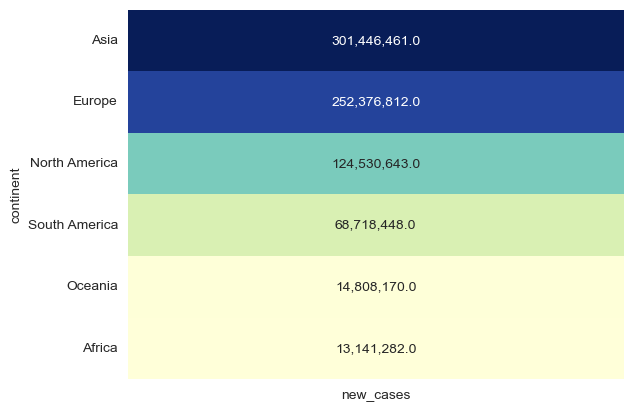

In [53]:
# Utilizzo la colonna "new_cases" per rappresentare il dato.
# Filtro il df rimuovendo le righe prive di location - > nel df non esistono righe prive di continente.
# La colonna rappresenta i nuovi casi confermati di COVID-19.
# Le informazioni nel df sono dettagliate a livello giornaliero.


(sns.heatmap(df.loc[~df["continent"].isna()]
 .groupby("continent")
 .agg({"new_cases":"sum"})
 .sort_values("new_cases", ascending = False) ,annot=True, cmap='YlGnBu', fmt=',', cbar=False)
)


In [6]:
# nel dataframe vi sono 18527 record senza continente, per un totale di 2.509.443.789 contagi
print(len(df.loc[df.continent.isna()].index), df.loc[df.continent.isna()]["new_cases"].sum())


18527 2509443789.0


## 2nd Request: Massimo, Media & Ratio per continente

In [7]:
#Considerando tutti i valori presenti a DB, anche quelli privi di continente.

total_world_cases = df.loc[:,"new_cases"].sum()
total_world_cases

(df.loc[~df["continent"].isna()]
 .groupby("continent")
 .agg(new_cases_max = ("new_cases", "max"),
      new_cases_mean = ("new_cases", "mean"),
      new_cases_sum = ("new_cases", "sum"))
).assign(ratio = lambda x: x["new_cases_sum"] / total_world_cases * 100)

,new_cases_max,new_cases_mean,new_cases_sum,ratio
continent,,,,
Africa,162987.0,150.304606,13141282.0,0.400104
Asia,40475477.0,4181.239490,301446461.0,9.177945
Europe,2417043.0,3257.736053,252376812.0,7.683954
North America,5650933.0,1989.688806,124530643.0,3.791504
Oceania,588813.0,402.253823,14808170.0,0.450855
South America,1283024.0,3199.927730,68718448.0,2.092226


In [8]:
# Considerando solo i record con il continente.

total_world_cases_with_continent = df.loc[~df["continent"].isna(),"new_cases"].sum()
total_world_cases_with_continent

(df.loc[~df["continent"].isna()]
 .groupby("continent")
 .agg(new_cases_max = ("new_cases", "max"),
      new_cases_mean = ("new_cases", "mean"),
      new_cases_sum = ("new_cases", "sum"))
).assign(ratio = lambda x: x["new_cases_sum"] / total_world_cases_with_continent * 100)

,new_cases_max,new_cases_mean,new_cases_sum,ratio
continent,,,,
Africa,162987.0,150.304606,13141282.0,1.695602
Asia,40475477.0,4181.239490,301446461.0,38.895223
Europe,2417043.0,3257.736053,252376812.0,32.563833
North America,5650933.0,1989.688806,124530643.0,16.068018
Oceania,588813.0,402.253823,14808170.0,1.910678
South America,1283024.0,3199.927730,68718448.0,8.866647


## 3rd Request: Italy

In [9]:
df_italy = df.loc[df["location"] == "Italy"].reset_index(drop=True)

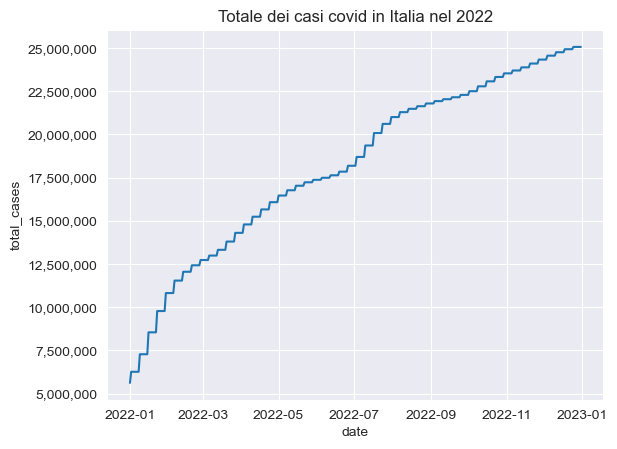

In [10]:
# Rappresentazione dei casi totali

mask = df_italy["date"].dt.year == 2022

sns.despine()
sns.set_style("darkgrid")
grafico = sns.lineplot(data=df_italy[mask], x="date", y="total_cases")

asse_y = grafico.axes.get_yaxis()

# Impostiamo un formattatore per l'asse y
asse_y.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.title("Totale dei casi covid in Italia nel 2022")

# Mostriamo il grafico
plt.show()

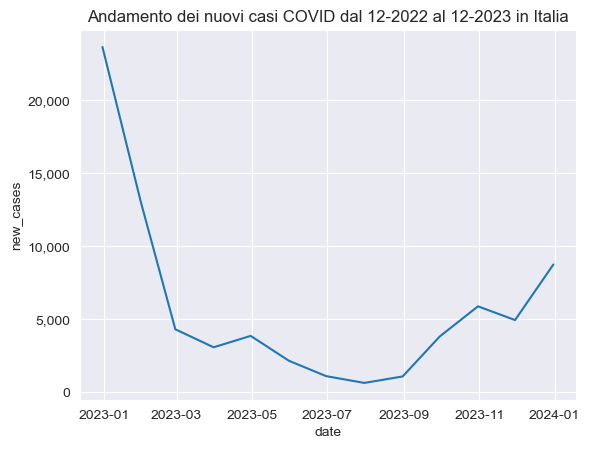

In [11]:
# Mostro i nuovi casi del 2023 rispetto alla data
# Ho pensato di raggruppare la media dei nuovi casi con resample mensile dal 12-2022 al 12-2023

df_italy_resampled = df_italy.set_index("date").resample("M")[["new_cases"]].mean().loc["12-2022" : "12-2023"]
grafico2 = sns.lineplot(data=df_italy_resampled, x=df_italy_resampled.index, y="new_cases")

asse_y = grafico2.axes.get_yaxis()

# Impostiamo un formattatore per l'asse y
asse_y.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.title("Andamento dei nuovi casi COVID dal 12-2022 al 12-2023 in Italia")

# Mostriamo il grafico
plt.show()

In [12]:
# Questo è il dataframe plottato
df_italy_resampled

,new_cases
date,
2022-12-31,23639.967742
2023-01-31,13041.838710
2023-02-28,4298.571429
2023-03-31,3064.129032
2023-04-30,3845.366667
2023-05-31,2138.806452
2023-06-30,1090.200000
2023-07-31,623.354839
2023-08-31,1066.516129


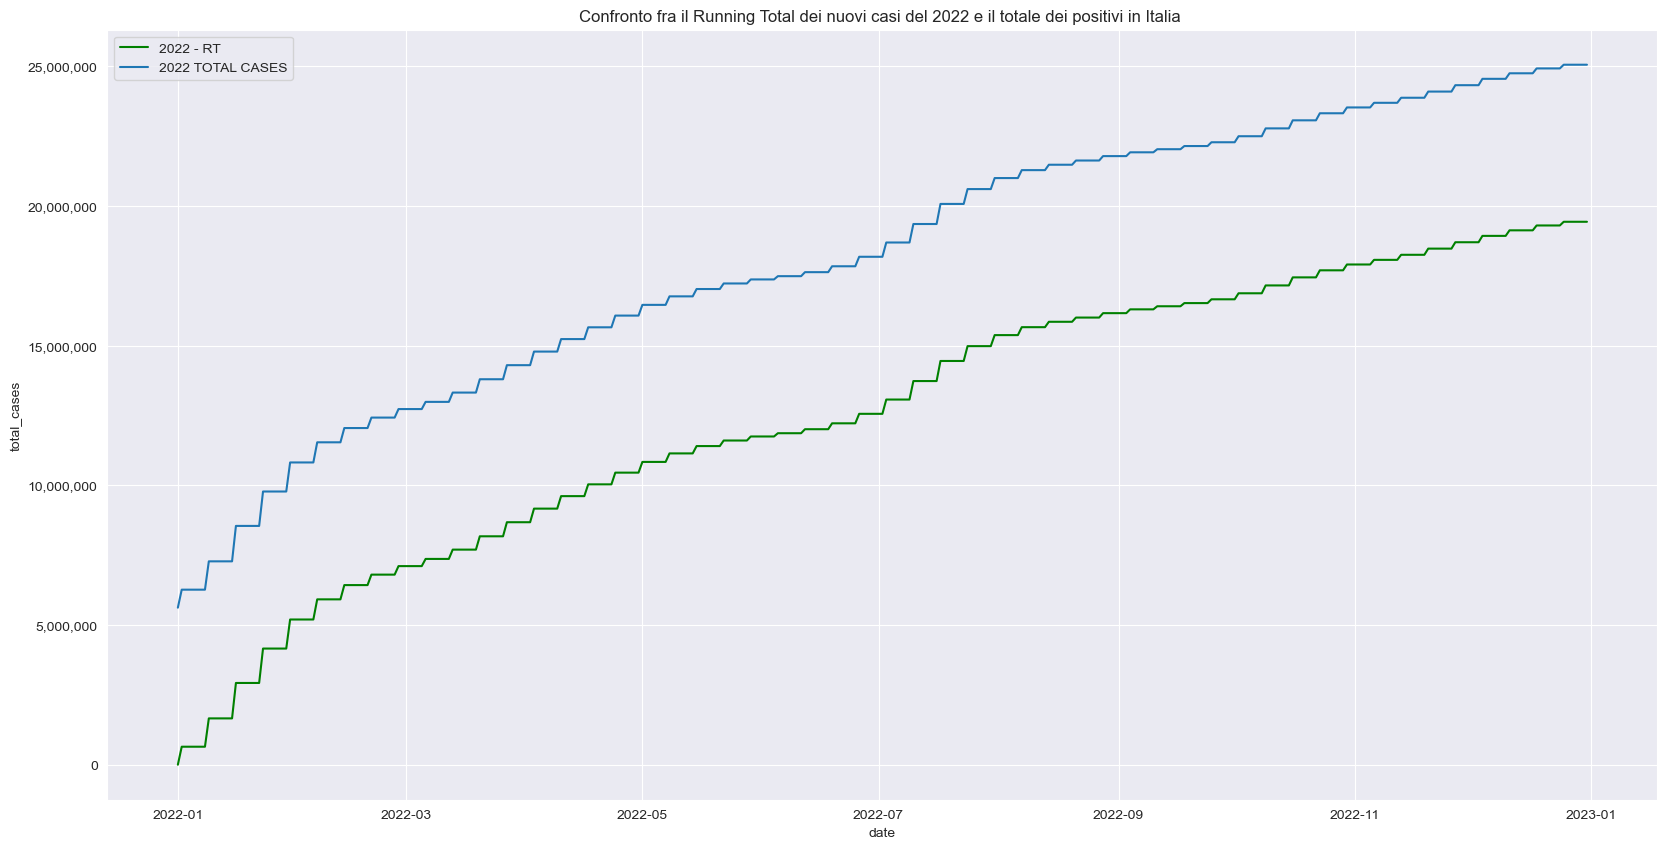

In [13]:
# RT sui nuovi casi nel 2022

df_italy22nc = df_italy.loc[mask, ["date", "new_cases"]].set_index("date")
df_italy22nc['running_total'] = df_italy22nc['new_cases'].cumsum()

fig, axes = plt.subplots(figsize = (20,10))

axes.plot(df_italy22nc.index, df_italy22nc["running_total"], color="green", label = "2022 - RT")
sns.lineplot(data=df_italy[mask], x="date", y="total_cases", ax=axes, label="2022 TOTAL CASES")
asse_y = axes.axes.get_yaxis()
asse_y.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.title("Confronto fra il Running Total dei nuovi casi del 2022 e il totale dei positivi in Italia ")

axes.legend(loc="upper left")

# Entrambi i grafici evidenziano il medesimo incremento dei positivi 

## 4th Request: BoxPlot Italia/Germania/Francia

In [14]:
countries = ["Italy", "Germany", "France"]
df_itfrge = df.set_index("date", drop=True).query("location in @countries").loc["05-2022":"04-2023"]

In [15]:
df_itfrge.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2022-05-01,FRA,Europe,France,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,429274.969,...,35.6,NaN,5.98,82.66,0.901,67813000.0,89517.72,6.19,6.24,1385.1523
2022-05-02,FRA,Europe,France,27742592.0,0.0,53787.143,146744.0,0.0,123.857,429274.969,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
2022-05-03,FRA,Europe,France,27742592.0,0.0,53787.143,146744.0,0.0,123.857,429274.969,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
2022-05-04,FRA,Europe,France,27742592.0,0.0,53787.143,146744.0,0.0,123.857,429274.969,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
2022-05-05,FRA,Europe,France,27742592.0,0.0,53787.143,146744.0,0.0,123.857,429274.969,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN


In [16]:
df_itfrge.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2023-04-26,ITA,Europe,Italy,25772459.0,0.0,3808.429,189627.0,0.0,26.714,436544.082,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
2023-04-27,ITA,Europe,Italy,25772459.0,0.0,3808.429,189627.0,0.0,26.714,436544.082,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
2023-04-28,ITA,Europe,Italy,25772459.0,0.0,3808.429,189627.0,0.0,26.714,436544.082,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
2023-04-29,ITA,Europe,Italy,25772459.0,0.0,3808.429,189627.0,0.0,26.714,436544.082,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
2023-04-30,ITA,Europe,Italy,25795509.0,23050.0,3292.857,189786.0,159.0,22.714,436934.512,...,27.8,NaN,3.18,83.51,0.892,59037472.0,241766.5,11.16,3.09,4106.733


<Axes: xlabel='location', ylabel='icu_patients'>

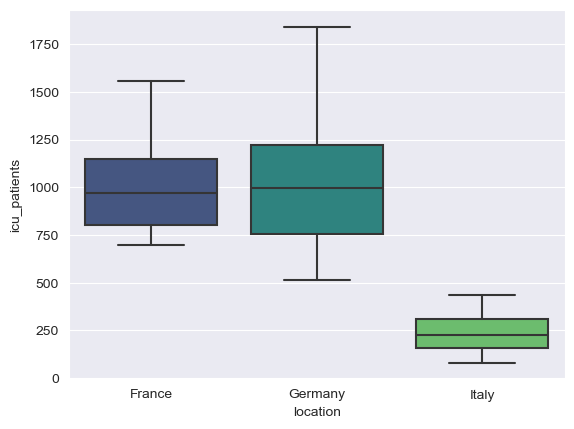

In [17]:
sns.boxplot(data=df_itfrge, x="location", y="icu_patients", palette="viridis")

# In Italia le media dei pazienti in terapia intesiva, per il periodo preso in esame, si aggira attorno ai 250 pazienti.
# In Francia e Germania il valore è molto più alto, circa 1000 pazienti, considerando tuttavia che la popolazione di
# queste due nazioni è maggiore rispetto a quella dell' Italia.

# Le densità dei valori in Germania è più ampia rispetto alla Francia, con un q25 attorno ai 750 pazienti e un q75 attorno ai 1250.
# La mediana si avvicina ai 1000 pazienti in terapia intensiva al giorno.

## 5th Request: Italia/Germania/Francia/Spagna 2023

In [19]:
countries2 = ["Italy", "Germany", "France", "Spain"]
df_itfrge2023 = df.set_index("date", drop=True).query("location in @countries2").loc["2023", ["location", "hosp_patients"]]

In [39]:
df_itfrge2023.loc[df_itfrge2023["location"]=="Spain"].loc["2023-05-30":"2023-07-31"]

,location,hosp_patients
date,,
2023-05-30,Spain,2283.0
2023-05-31,Spain,2217.0
2023-06-01,Spain,2189.0
2023-06-02,Spain,2185.0
2023-06-03,Spain,2259.0
...,...,...
2023-07-27,Spain,NaN
2023-07-28,Spain,NaN
2023-07-29,Spain,NaN


In [41]:
df_itfrge2023.groupby("location")[["hosp_patients"]].sum()

,hosp_patients
location,
France,1382574.0
Germany,0.0
Italy,1175272.0
Spain,354602.0


In [52]:
#In Germania i dati al 2023 sono assenti:

df_itfrge2023.loc[df_itfrge2023["location"]=="Germany"]["hosp_patients"].value_counts(dropna=False)

hosp_patients
NaN    365
Name: count, dtype: int64

In una situazione simile cercare di rimpiazzare i dati con la media con con tecniche di interpolazione (ffill, bfill, interpolation) non sarebbe corretto in quanto i dati che mancano sono davvero troppi.
L'ideale sarebbe consultare degli esperti di dominio per andare a fondo circa la questione.